In [42]:
# loading related packaes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading related dataset
rent = pd.read_csv('../Data/canada_rent.csv')

# Displaying the first five rows of the dataset
rent.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [43]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

#### Running info() is providing the structure of the dataset, i.e. a summary of it, including the data types of each column, the number of non-null entries etc
#### There are 18 columns: 4 columns in numerical format (float64(3) + int64(1)) and 14 columns in categorical format (object(14))  
#### There are 25,771 entries (rows)

In [44]:
# Find missing values
rent.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [46]:
# Clean missing values
rent=rent.dropna()

In [48]:
# Check each columns' unique values
rent.nunique().sort_values(ascending=False)

link                 7195
rentfaster_id        7194
longitude            6715
latitude             6708
address              6113
price                2220
sq_feet              1811
city                  224
availability_date     119
baths                  16
type                   12
beds                   10
province               10
lease_term              6
furnishing              4
smoking                 4
cats                    2
dogs                    2
dtype: int64

#### I look at the unique values of each column to see which columns might be useful. Some columns have too many unique values. In order to get clean and usable data, some columns need to be dropped. In my example, the columns with too many unique values (those with 3 digit numbers) are dropped.


In [49]:
rent = rent[['price', 'type','beds','province','lease_term','furnishing','smoking','cats', 'dogs']]

#### Visualitation between "price" and other columns

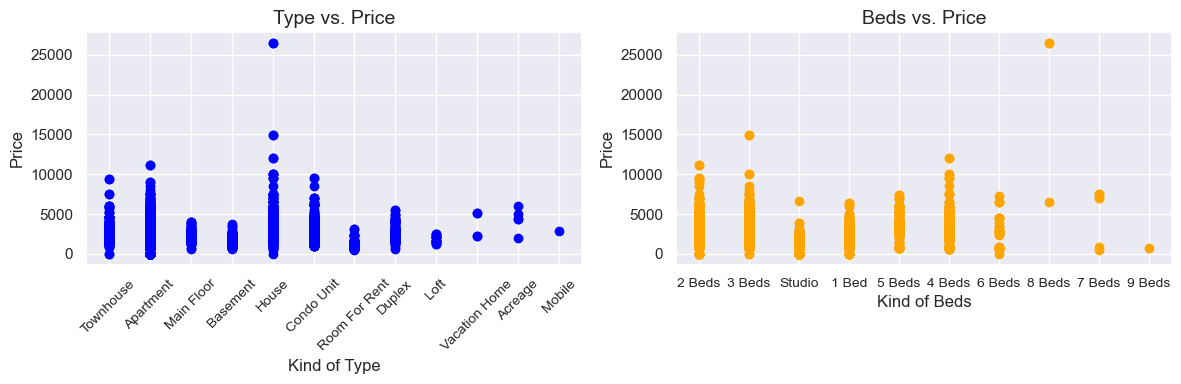

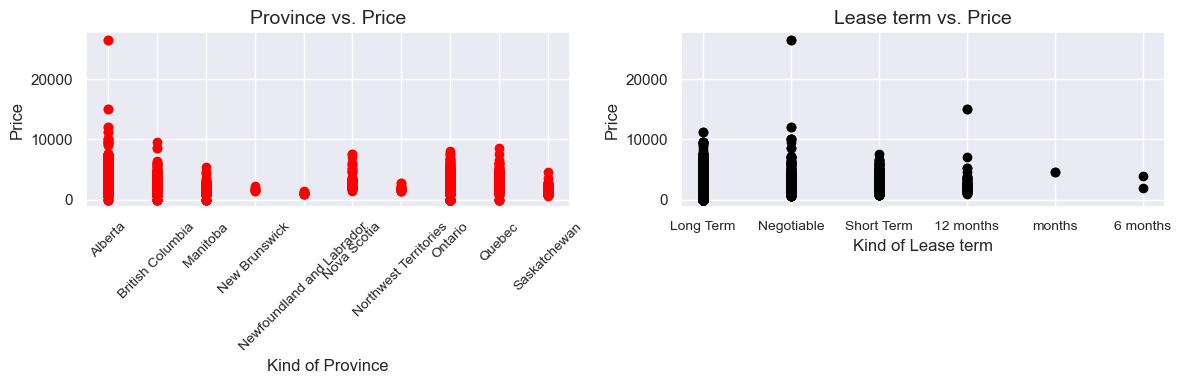

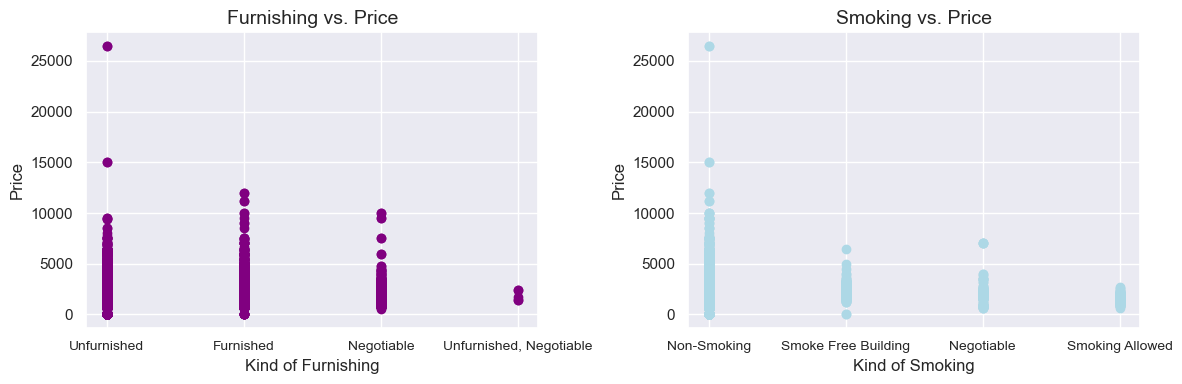

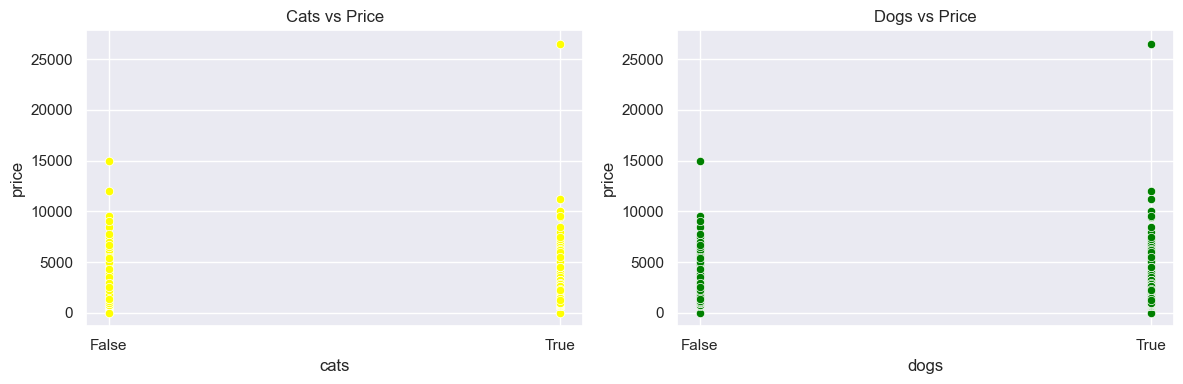

In [53]:
sns.set(style="darkgrid")

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize for a better layout

axs[0].scatter(rent['type'], rent['price'], color='blue')
axs[0].set_xlabel("Kind of Type", fontsize=12)
axs[0].set_ylabel("Price", fontsize=12)
axs[0].set_title("Type vs. Price", fontsize=14)
axs[0].grid(True)
axs[0].tick_params(axis='x', labelsize=10, rotation=45)

axs[1].scatter(rent['beds'], rent['price'], color='orange')
axs[1].set_xlabel("Kind of Beds", fontsize=12)
axs[1].set_ylabel("Price", fontsize=12)
axs[1].set_title("Beds vs. Price", fontsize=14)
axs[1].grid(True)
axs[1].tick_params(axis='x', labelsize=10)

plt.tight_layout();

fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize for a better layout

axs[0].scatter(rent['province'], rent['price'], color='red')
axs[0].set_xlabel("Kind of Province", fontsize=12)
axs[0].set_ylabel("Price", fontsize=12)
axs[0].set_title("Province vs. Price", fontsize=14)
axs[0].grid(True)
axs[0].tick_params(axis='x', labelsize=10, rotation=45)

axs[1].scatter(rent['lease_term'], rent['price'], color='black')
axs[1].set_xlabel("Kind of Lease term", fontsize=12)
axs[1].set_ylabel("Price", fontsize=12)
axs[1].set_title("Lease term vs. Price", fontsize=14)
axs[1].grid(True)
axs[1].tick_params(axis='x', labelsize=10)

plt.tight_layout();

fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize for a better layout

axs[0].scatter(rent['furnishing'], rent['price'], color='purple')
axs[0].set_xlabel("Kind of Furnishing", fontsize=12)
axs[0].set_ylabel("Price", fontsize=12)
axs[0].set_title("Furnishing vs. Price", fontsize=14)
axs[0].grid(True)
axs[0].tick_params(axis='x', labelsize=10)

axs[1].scatter(rent['smoking'], rent['price'], color='lightblue')
axs[1].set_xlabel("Kind of Smoking", fontsize=12)
axs[1].set_ylabel("Price", fontsize=12)
axs[1].set_title("Smoking vs. Price", fontsize=14)
axs[1].grid(True)
axs[1].tick_params(axis='x', labelsize=10)

plt.tight_layout();

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=rent, x='cats', y='price',color='yellow')
plt.title('Cats vs Price')
plt.xticks([0, 1], ['False', 'True'])

plt.subplot(1, 2, 2)
sns.scatterplot(data=rent, x='dogs', y='price',color='green')
plt.title('Dogs vs Price')
plt.xticks([0, 1], ['False', 'True'])

plt.tight_layout();


### Linear Regression Model

In [7]:
# Transform the "object" format into "numerical" since machine learning algorithms and statistical models require "numerical".
rent = pd.get_dummies(rent, drop_first=True)
rent = rent.astype(int)

rent.head()

,price,type_Apartment,type_Basement,type_Condo Unit,type_Duplex,type_House,type_Loft,type_Main Floor,type_Mobile,type_Room For Rent,...,lease_term_Short Term,lease_term_months,furnishing_Negotiable,furnishing_Unfurnished,"furnishing_Unfurnished, Negotiable",smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed,cats_True,dogs_True
0,2495,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
1,2695,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
2,2295,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
3,2095,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
4,2495,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1


In [22]:
# Split data into features and target
X = rent.drop('price', axis=1)
y = rent['price']

In [23]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17403, 42), (1934, 42), (17403,), (1934,))

In [24]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17403, 42), (1934, 42), (17403,), (1934,))

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression R^2: {r2}")

Linear Regression MAE: 436.23293569451295
Linear Regression MSE: 858404.4498609235
Linear Regression RMSE: 926.501187188081
Linear Regression R^2: 0.3722021787961859


In [27]:
final_model = LinearRegression()
final_model.fit(X,y)
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['price'])
coeff_df

,price
type_Apartment,-1710.362524
type_Basement,-2180.750985
type_Condo Unit,-1529.506432
type_Duplex,-1769.540407
type_House,-1334.049894
type_Loft,-1618.470477
type_Main Floor,-1940.944972
type_Mobile,-2416.999264
type_Room For Rent,-3368.109713
type_Townhouse,-1665.345205


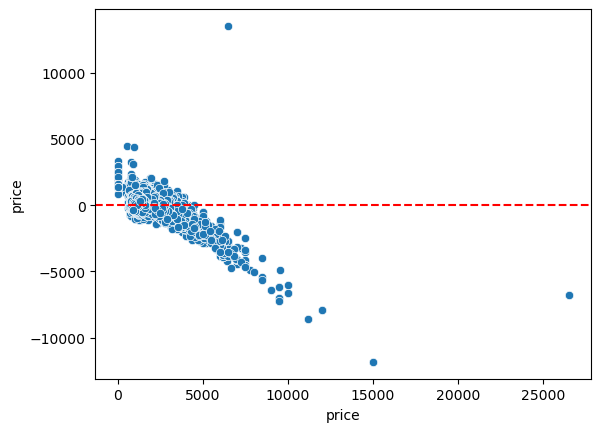

In [28]:
y_pred = final_model.predict(X)
residuals = y_pred - y
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

#### The residual plot shows a clear pattern, which indicates that the linear regression model is not well-fitted to the data. Specifically, the pattern shows a strong downward trend in the residuals as the actual price increases.

### Polynomial Regression

In [9]:
# Check highest correlation with the price column
corr = rent.corr(numeric_only=True)
charges_corr = corr['price']
charges_corr.abs().sort_values(ascending=False).iloc[1:4]

type_House     0.309973
beds_8 Beds    0.246256
beds_Studio    0.217746
Name: price, dtype: float64

In [10]:
X=rent[['type_House', 'beds_8 Beds', 'beds_Studio']]
y = rent['price']

from sklearn.preprocessing import PolynomialFeatures
# Create an instance of PolynomialFeatures

poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit converter to X features + transform features

poly_features = poly_converter.fit_transform(X)

# Compare shape of X vs. shape of new features

X.shape, poly_features.shape

((19337, 3), (19337, 9))

In [11]:
# Train/test split
# Instead of using X, we will use poly_features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.15, random_state=1)

# Import model

from sklearn.linear_model import LinearRegression

# Create instance of model

model = LinearRegression()

# Train regression model on 9 features instead of 3

model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(f"Regression MAE: {MAE}")
print(f"Regression MSE: {MSE}")
print(f"Regression RMSE: {RMSE}")

Regression MAE: 570.4994504251666
Regression MSE: 915486.0292072842
Regression RMSE: 956.810341294075


In [14]:
y_train_pred = model.predict(X_train)

train_MAE = mean_absolute_error(y_train, y_train_pred)
train_MSE = mean_squared_error(y_train, y_train_pred)
train_RMSE = np.sqrt(train_MSE)
print(f"TRAIN MAE: {train_MAE}")
print(f"TRAIN MSE: {train_MSE}")
print(f"TRAIN RMSE: {train_RMSE}")

TRAIN MAE: 555.1613962744814
TRAIN MSE: 633064.8263817888
TRAIN RMSE: 795.6537100911356


In [15]:
from sklearn.preprocessing import StandardScaler

# List to save RMSE for training data
train_rmse_errors = []
# List to save RMSE for testing data
test_rmse_errors = []
# List to save degrees
degrees = []

# Loop over polynomial degrees
for d in range(1, 16):  # Compare polynomial degrees from 1 to 15
    # Create poly features for each degree "d"
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # Split dataset into train/test split
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.15, random_state=1)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create and train the final model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Get predictions for both train and test data
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # Calculate RMSE for training set
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    
    # Calculate RMSE for testing set
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Store errors and degrees to lists
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    degrees.append(d)

# Create df with RMSE scores + degrees
results_df = pd.DataFrame({
    'Degree': degrees,
    'Train RMSE': train_rmse_errors,
    'Test RMSE': test_rmse_errors
})

results_df

,Degree,Train RMSE,Test RMSE
0,1,795.642626,956.830544
1,2,795.655233,958.647094
2,3,795.655248,958.645598
3,4,795.658340,954.532938
4,5,795.659942,958.672583
5,6,795.686409,947.317031
6,7,795.668598,962.005326
7,8,795.668744,949.952908
8,9,795.653508,950.681429
9,10,795.694989,940.930187


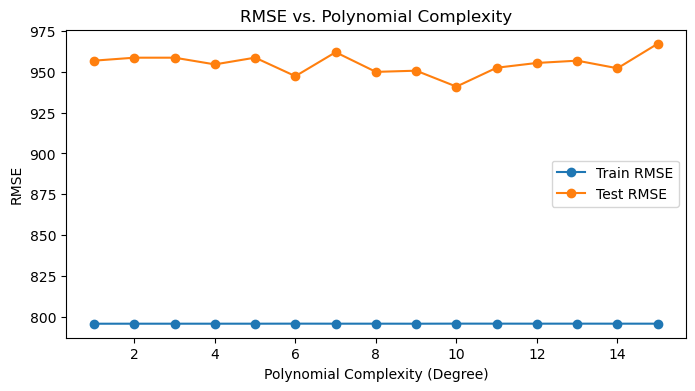

In [16]:
# Visualize RMSE vs. Complexity for train and test sets
plt.figure(figsize=(8, 4))
plt.plot(range(1, 16), train_rmse_errors, label='Train RMSE', marker='o')
plt.plot(range(1, 16), test_rmse_errors, label='Test RMSE', marker='o')
plt.xlabel("Polynomial Complexity (Degree)")
plt.ylabel("RMSE")
plt.legend()
plt.title("RMSE vs. Polynomial Complexity");

#### The RMSE on the training data (795.65) is noticeably lower than on the test data (956.81). The increase in RMSE from training to test data suggests that the model has some degree of overfitting. The difference indicates mild overfitting since the gap isn't excessively large, so it's not severe overfitting.

### Ridge Regression

In [17]:
X=rent[['type_House', 'beds_8 Beds', 'beds_Studio']]
y = rent['price']

from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=4, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)

poly_features.shape

(19337, 34)

In [19]:
# Train/test split
# Instead of using X, we will use poly_features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.15, random_state=1)

# Scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Import model

from sklearn.linear_model import Ridge

# Create instance of model
ridge_model = Ridge(alpha=10)

# Fit the model on scaled_X_train
ridge_model.fit(scaled_X_train, y_train)

Ridge(alpha=10)

In [20]:
# Evaluate ridge model

y_pred = ridge_model.predict(scaled_X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error

# Obtain metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f"Ridge MAE: {MAE}")
print(f"Ridge MSE: {MSE}")
print(f"Ridge RMSE: {RMSE}")

Ridge MAE: 570.5494377619941
Ridge MSE: 915530.8652319197
Ridge RMSE: 956.8337709507956


In [21]:
# Import model

from sklearn.linear_model import RidgeCV

# Create instance of model
ridgecv_model = RidgeCV((0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

# Fit the model on scaled_X_train
ridgecv_model.fit(scaled_X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [22]:
ridgecv_model.alpha_

10.0

In [23]:
# Evaluate ridgecv model

y_pred = ridgecv_model.predict(scaled_X_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(570.5494377618493, 915530.8652251962, 956.8337709472822)

#### The Ridge Regression model's performance is very close to that of previous model, indicating that regularization did not lead to significant improvements in this case. 

### Lasso Regression

In [30]:
X=rent[['type_House', 'beds_8 Beds', 'beds_Studio']]
y = rent['price']
# Import model

from sklearn.linear_model import LassoCV

# Create instance of model
lassocv_model = LassoCV(eps=0.01,n_alphas=200,cv=10)

# Fit the model on scaled_X_train
lassocv_model.fit(scaled_X_train, y_train)

LassoCV(cv=10, eps=0.01, n_alphas=200)

In [31]:
lassocv_model.alpha_

2.6916054548841752

In [32]:
# Evaluate lassocv model

y_pred = lassocv_model.predict(scaled_X_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f"Lasso MAE: {MAE}")
print(f"Lasso MSE: {MSE}")
print(f"Lasso RMSE: {RMSE}")

Lasso MAE: 570.6815537622772
Lasso MSE: 925245.1945999017
Lasso RMSE: 961.8966652400359


#### The LASSO model has a higher MAE (570.68) compared to previous regressions (570.50 and 570.55). This indicates that, on average, LASSO's predictions are less accurate than the others. The MSE (925,245.19) and RMSE (961.90) for LASSO are also higher than those. This suggests that LASSO does not outperform the other models in terms of prediction accuracy.

### Cross Validation

In [33]:
X=rent[['type_House', 'beds_8 Beds', 'beds_Studio']]
y = rent['price']
from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)
# Scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)
from sklearn.linear_model import Ridge

bad_model = Ridge(alpha=100)

bad_model.fit(scaled_X_train, y_train)

Ridge(alpha=100)

In [34]:
y_val_preds = bad_model.predict(scaled_X_val)
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error,mean_squared_error

# Obtain metrics
MAE = mean_absolute_error(y_val, y_val_preds)
MSE = mean_squared_error(y_val, y_val_preds)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(578.8132529537086, 945602.5707981962, 972.4209843469012)

In [35]:
model2 = Ridge(alpha=1)

model2.fit(scaled_X_train, y_train)

Ridge(alpha=1)

In [36]:
model2_preds = model2.predict(scaled_X_val)

# Obtain metrics
MAE = mean_absolute_error(y_val, model2_preds)
MSE = mean_squared_error(y_val, model2_preds)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(578.8221992056642, 944786.9849462686, 972.0015354649747)

In [37]:
# Final Evaluation
final_preds = model2.predict(scaled_X_test)

# Obtain metrics
MAE = mean_absolute_error(y_test, final_preds)
MSE = mean_squared_error(y_test, final_preds)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(546.4280684110939, 600828.0047404444, 775.1309597354788)

In [38]:
# Standard train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Bad alpha choice on purpose
model = Ridge(alpha=100)

# Import cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)


#Adjust Model
model = Ridge(alpha=1)

scores = cross_val_score(model, scaled_X_train, y_train, scoring='neg_mean_squared_error',cv=5)

abs(scores.mean())

633923.8235840821

In [39]:
model.fit(scaled_X_train, y_train)

Ridge(alpha=1)

In [40]:
final_y = model.predict(scaled_X_test)

# Obtain metrics
MAE = mean_absolute_error(y_test, final_y)
MSE = mean_squared_error(y_test, final_y)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(570.5504844268005, 915530.5001842962, 956.8335801926562)

In [41]:
# Standard train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
# Bad alpha choice
model = Ridge(alpha=100)
# Import cross_validate
from sklearn.model_selection import cross_validate

# Select multiple evaluation metrics
scores = cross_validate(model, scaled_X_train, y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)
model = Ridge(alpha=1)
# Select multiple evaluation metrics
scores = cross_validate(model, scaled_X_train, y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

pd.DataFrame(scores).mean()

fit_time                             0.001751
score_time                           0.001419
test_neg_mean_absolute_error      -555.371386
test_neg_mean_squared_error    -633923.823584
test_max_error                   -8867.968349
dtype: float64

In [54]:
model.fit(scaled_X_train , y_train)
final_y = model.predict(scaled_X_test)

# Obtain metrics
MAE = mean_absolute_error(y_test, final_y)
MSE = mean_squared_error(y_test, final_y)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(570.5504844268005, 915530.5001842962, 956.8335801926562)

#### The MAE, MSE, and RMSE from the test set are slightly higher than the values from cross-validation, which is expected as the model is now being evaluated on unseen data. This indicates that the model is generalizing fairly well. 
#### The MAE suggests that, on average, the predictions deviate from the actual values by approximately 570.55. The RMSE, at about 956.83, indicates that there are instances where predictions can be significantly off.

### Conclusion:

#### The Ridge regression model performs reasonably well with the current parameters. The results are consistent, showing that the model can predict rental prices with an acceptable level of accuracy.